## 特征准备

In [6]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from functions import calc_ivs,calc_woe
%matplotlib inline

In [8]:
path = 'data/'
train_queries = pd.read_csv(path + 'train_queries.csv', parse_dates=['req_time'])
train_plans   = pd.read_csv(path + 'train_plans.csv', parse_dates=['plan_time'])
train_clicks  = pd.read_csv(path + 'train_clicks.csv')
profiles      = pd.read_csv(path + 'profiles.csv') 
test_queries  = pd.read_csv(path + 'test_queries.csv', parse_dates=['req_time'])
test_plans    = pd.read_csv(path + 'test_plans.csv', parse_dates=['plan_time'])

In [9]:
#base data
train = train_queries.merge(train_plans, 'left', ['sid'])
test  = test_queries.merge(test_plans, 'left', ['sid'])
train = train.merge(train_clicks, 'left', ['sid'])
train['click_mode'] = train['click_mode'].fillna(0).astype(int)
data  = pd.concat([train, test], ignore_index=True)
data  = data.merge(profiles, 'left', ['pid']) 
data.shape

/home/liuting/venv/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(594358, 75)

In [10]:
data['plans'] = data['plans'].fillna('[]').apply(eval)
df_plan = transform_plans(data)

In [26]:
df_plan.loc[df_plan.groupby(['sid'])['eta'].idxmin()][]

KeyboardInterrupt: 

In [13]:
df_plan['eta_rank'] = df_plan.groupby(['sid'])['eta'].rank(method='first')
df_plan.groupby(['sid'])['eta_rank'].max

<bound method GroupBy.max of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fa0587e7a90>>

In [32]:
tmp = pd.DataFrame()
df_plan.loc[df_plan.loc[:200,:].groupby(['sid'])['eta'].idxmax()][['sid','transport_mode']]

,sid,transport_mode
169,6879,7
129,165662,10
75,184189,5
117,296598,7
111,307643,7
101,409847,1
123,547098,5
22,559931,1
106,627704,1
46,676316,1


In [41]:
df_plan.loc[:200,:].groupby(['sid'])['transport_mode'].head(1).reset_index(drop=True)

0      9
1      7
2      9
3     10
4      7
5      3
6      3
7      1
8      5
9      3
10     1
11     1
12     9
13     6
14     1
15     4
16     2
17     5
18     7
19     2
20     9
21     6
22     7
23     9
24     5
25     7
26     2
27     4
28     5
29     2
30     1
31     2
32     3
33     9
34     1
35     2
36     1
37     2
38    10
39     9
Name: transport_mode, dtype: int64

In [39]:
df_plan[df_plan['sid']==6879]
df_plan.loc[:200,:]

,sid,plan_num,distance,eta,price,transport_mode,speed,time_cost,plan_order,eta_rank
0,3000821,6,5219,1367,300,9,3.817849,0.219459,1,4.0
1,3000821,6,4537,1035,0,3,4.383575,0.000000,2,1.0
2,3000821,6,4537,1095,2100,4,4.143379,1.917808,3,2.0
3,3000821,6,4118,1243,0,6,3.312953,0.000000,4,3.0
4,3000821,6,5219,1679,300,2,3.108398,0.178678,5,5.0
5,3000821,6,4046,3672,0,5,1.101852,0.000000,6,6.0
6,3085857,5,13864,3221,600,7,4.304253,0.186278,1,4.0
7,3085857,5,11106,1122,0,3,9.898396,0.000000,2,1.0
8,3085857,5,11106,1362,2900,4,8.154185,2.129222,3,2.0
9,3085857,5,13488,2315,400,9,5.826350,0.172786,4,3.0


### plans

In [7]:
def transform_plans(plans):
    #plans dic
    plans_rows = []
    for p_dics in plans['plans'].values:
        plans_rows.extend(p_dics)
    #plans info
    plans['plan_num'] = plans['plans'].apply(len)
    sid_list=[]
    plan_num=[]
    for sid,num in plans[['sid','plan_num']].values:
        sid_list.extend([sid]*num)
        plan_num.extend([num]* num)
    #concat
    df_plan = pd.DataFrame(sid_list,columns=['sid'])
    df_plan['plan_num']=plan_num
    df_plan = pd.concat([df_plan,pd.DataFrame(plans_rows)],axis=1)
    
    df_plan['price'] = df_plan['price'].apply(lambda x:int(x) if x!='' else 0)
    df_plan['speed']= df_plan['distance']*1.0 / df_plan['eta']
    df_plan['time_cost']= df_plan['price']*1.0 / df_plan['eta'] 
    df_plan['plan_order']= df_plan.groupby(['sid']).cumcount()+1
    return df_plan

In [434]:
def gen_plan_rank_feature(df):
    #值排序  
    df_plan = df.copy()
    df_plan['eta_rank'] = df_plan.groupby(['sid'])['eta'].rank(method='first')
    df_plan['distance_rank'] = df_plan.groupby(['sid'])['distance'].rank(method='first')
    df_plan['price_rank'] =  df_plan.groupby('sid')['price'].rank(method='first')
    df_plan['speed_rank'] = df_plan.groupby(['sid'])['speed'].rank(method='first')
    df_plan['time_cost_rank'] = df_plan.groupby(['sid'])['time_cost'].rank(method='first')
    df_plan['mode_distance_rank'] = df_plan.groupby(['transport_mode'])['distance'].rank(method='first')
    df_plan['mode_eta_rank'] = df_plan.groupby(['transport_mode'])['eta'].rank(method='first')
    df_plan['mode_price_rank'] = df_plan.groupby(['transport_mode'])['price'].rank(method='first')
    rank_feature=['eta_rank','distance_rank','price_rank','speed_rank','time_cost_rank','mode_distance_rank','mode_eta_rank','mode_price_rank']
    return df_plan,rank_feature

In [4]:
def feature_describe(df, by_key, on_col, cols=[]):
    tmp_df = df.groupby(by_key)[on_col].agg(cols)
    tmp_df.columns = [by_key+'_'+on_col+'_'+col for col in cols]   
    df = df.merge(tmp_df.reset_index(),how='left',on=by_key)
    return df
def gen_plan_statis_feature(df): 
    #值统计特征
    df_plan = df.copy()
    feature_org = set(df_plan.columns)
    df_plan = feature_describe(df_plan,'sid','distance',['mean','std','min','max'])
    df_plan = feature_describe(df_plan,'sid','eta',['mean','std','min','max'])    
    df_plan = feature_describe(df_plan,'sid','price',['mean','std','min','max'])  
    df_plan = feature_describe(df_plan,'sid','speed',['mean','std','min','max'])  
    df_plan = feature_describe(df_plan,'transport_mode','distance',['mean', 'std', 'min', 'median', 'max'])
    df_plan = feature_describe(df_plan,'transport_mode','eta',['mean', 'std', 'min', 'median', 'max'])
    df_plan = feature_describe(df_plan,'transport_mode','price',['mean', 'std', 'min','median', 'max'])
    df_plan = feature_describe(df_plan,'transport_mode','speed',['mean', 'std', 'min', 'median', 'max'])
    statis_feature = set(df_plan.columns) - feature_org
    return df_plan,list(statis_feature)    

In [4]:
def feature_describe(df, by_key, on_col, cols=[]):
    tmp_df = df.groupby(by_key)[on_col].agg(cols)
    tmp_df.columns = [by_key+'_'+on_col+'_'+col for col in cols]   
    df = df.merge(tmp_df.reset_index(),how='left',on=by_key)
    return df

In [5]:
def gen_plan_feature():
    plans_train = pd.read_csv("data/train_plans.csv", parse_dates=['plan_time'])
    plans_test = pd.read_csv('data/test_plans.csv', parse_dates=['plan_time'])
    plans = pd.concat([plans_train,plans_test],axis=0)
    plans['plans'] = plans['plans'].apply(eval)
    #extract plan features
    df_plan = transform_plans(plans)
    plan_feature = [col for col in df_plan.columns if col!='sid']
    
    #extract rank feature
    df_plan,rank_feature = gen_plan_rank_feature(df_plan)
    
    #extract statis_feature
    df_plan,statis_feature = gen_plan_statis_feature(df_plan)
    
    #extract time features
    time_feature = []
    plans['plan_day'] = plans['plan_time'].apply(lambda x :x.day)
    plans['plan_hour'] = plans['plan_time'].apply(lambda x :x.hour)
    plans['plan_weekday'] = plans['plan_time'].apply(lambda x :x.dayofweek+1)
    time_feature.extend(['plan_day','plan_hour','plan_weekday'])
    
    #merge
    df_plan=df_plan.merge(plans[['sid','plan_time','plan_day','plan_hour','plan_weekday']],how='left',on='sid')
    return df_plan,plan_feature,rank_feature,statis_feature,time_feature

In [3]:
plans_train = pd.read_csv("data/train_plans.csv", parse_dates=['plan_time'])
plans_test = pd.read_csv('data/test_plans.csv', parse_dates=['plan_time'])
plans = pd.concat([plans_train,plans_test],axis=0)
plans['plans'] = plans['plans'].apply(eval)

### query

In [7]:
def get_haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [459]:
def gen_query_feature():
    #query data
    train_query = pd.read_csv("data/train_queries.csv", usecols =['sid','pid','o','d'])
    test_query = pd.read_csv("data/test_queries.csv", usecols =['sid','pid','o','d'])
    query = pd.concat([train_query,test_query],axis=0)

    #split o,d
    o_split = query['o'].apply(lambda x:[float(x) for x in x.split(',')])
    d_split = query['d'].apply(lambda x:[float(x) for x in x.split(',')])
    query['o_x'] = o_split.apply(lambda x:x[0])
    query['o_y'] = o_split.apply(lambda x:x[1])
    query['d_x'] = d_split.apply(lambda x:x[0])
    query['d_y'] = d_split.apply(lambda x:x[1])
    query['haversine'] = query.apply(lambda x:get_haversine_np(x['o_y'],
                                                        x['o_x'],
                                                        x['d_y'],
                                                        x['d_x']),axis=1)
    query_feature = ['o_x','o_y','d_x','d_y','haversine']
    return train_query,test_query,query,query_feature

In [9]:
def gen_OD_feature(df):
    tmp = train.groupby(by=['o'])['transport_mode'].value_counts().unstack().reset_index().fillna(0)
    od_df = train[['o','d']].drop_duplicates().merge(tmp,'left','o')
    tmp =train.groupby(by=['d'])['transport_mode'].value_counts().unstack().reset_index().fillna(0)
    od_df = od_df.merge(tmp,'left','d',suffixes=('_o', '_d'))
    od_feature = []
    for i in range(1,12):
        i= i*1.0
        od_feature = od_feature + ['mode'+str(i),str(i)+'_o',str(i)+'_d']
        od_df['mode'+str(i)] = od_df[str(i)+'_o'] + od_df[str(i)+'_d']
    return od_df,od_feature

### user_profile

In [10]:
def gen_profile_feature():
    user = pd.read_csv("data/profiles.csv")
    user['p_sum'] = user.iloc[:,1:].apply(lambda x:x.sum(),axis=1)
    return user

In [11]:
def gen_pid_statis(data):
    feature_org = set(data.columns)
    data = feature_describe(data,'pid','distance',['mean', 'std', 'min','median', 'max'])
    data = feature_describe(data,'pid','eta',['mean', 'std', 'min', 'median', 'max'])
    data = feature_describe(data,'pid','price',['mean', 'std', 'min', 'median', 'max'])
    data = feature_describe(data,'pid','speed',['mean', 'std', 'min', 'median', 'max'])
    sts_feature = list(set(data.columns) - feature_org)
    return data,sts_feature

### embeding

In [111]:
#矩阵分解
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
def get_svd_feature(train,by_key,on_key,size=5):
    train[on_key] = train[on_key].astype(str)
    tmp = train.groupby(by=by_key)[on_key].apply((lambda x :' '.join(x))).reset_index()
    mode_texts = tmp[on_key].values
    tfidf_enc = TfidfVectorizer(ngram_range=(1, 2))
    tfidf_vec = tfidf_enc.fit_transform(mode_texts)
    svd_enc = TruncatedSVD(n_components=size, n_iter=20, random_state=2019)
    mode_svd = svd_enc.fit_transform(tfidf_vec)
    mode_svd = pd.DataFrame(mode_svd)
    if type(by_key)==list:
        svd_feature = ['_'.join(by_key)+'_'+on_key+'_'+'svd_{}'.format(i) for i in range(size)]
    else:
        svd_feature = [by_key+'_'+on_key+'_'+'svd_{}'.format(i) for i in range(size)]
    mode_svd.columns  = svd_feature
    svd_df = pd.concat([tmp[by_key],mode_svd],axis=1)
    return svd_df,svd_feature

In [123]:
from gensim.models import Word2Vec
import multiprocessing
def item2vec(df,name,concat_name,size=8,window=2,model_iter=3,train_iter = 5):
    df[concat_name] = df[concat_name].astype(str)
    res = df.groupby(name)[concat_name].apply((lambda x :'ddd'.join(x))).reset_index()
    res.columns = [name,'%s_doc'%concat_name]
    sentence = []
    for line in list(res['%s_doc'%concat_name].values):
        sentence.append(line.split('ddd'))
    print('training...')
    model = Word2Vec(sentence,size=size, window=window, min_count=1,workers=multiprocessing.cpu_count(),iter=model_iter)
    for i in range(train_iter):
        for t in sentence:
            random.shuffle(t)
        model.train(sentence,total_examples=model.corpus_count,epochs=model.epochs)
    print('outputing...')
    final_doc = df[[concat_name]].drop_duplicates().reset_index(drop=True)
    final_emb = final_doc[concat_name].apply(lambda x:list(model[str(x)]))
    item_feature = [name+'_'+concat_name+'_'+'emb_'+str(i) for i in range(len(final_emb.values[0]))]
    d_doc_em = pd.concat([final_doc[[concat_name]],
        pd.DataFrame(list(final_emb.values),columns=item_feature)],axis=1)
#     df = pd.merge(df,d_doc_em,on=concat_name,how='left')
    return d_doc_em,item_feature

In [397]:
#doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import random
def gen_doc2vec_feature(df,on_key,size):
#     df[on_key] = df[on_key].astype(str)
#     tmp = df.groupby(by_key)[on_key].apply(list).reset_index()
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df[on_key].values)]
    model = Doc2Vec(documents, vector_size=size, window=2, min_count=1, workers=4)
    df_doc = pd.DataFrame()
    doc_vec = df[on_key].apply(lambda x:model.infer_vector(x))
    for i in range(size):
        df_doc[on_key+'_doc_'+str(i)] = doc_vec.apply(lambda x:x[i])
    cols = [on_key+'_doc_'+str(i) for i in range(size)]
    return df_doc,cols    

## 特征整合

In [6]:
df_plan,plan_feature,rank_feature,statis_feature,time_feature = gen_plan_feature()
# df_plans[0].to_csv('outdata/plans_detail.csv',index=None)
df_plan.head(2).T

,0,1
sid,1709112,1709112
plan_num,5,5
distance,32303,33678
eta,5087,3149
price,600,0
transport_mode,9,3
speed,6.35011,10.6948
time_cost,0.117948,0
plan_order,1,2
eta_rank,3,1


In [229]:
#base feature
train_query,test_query,query,query_feature = gen_query_feature()
df_plan,plan_feature,rank_feature,statis_feature,time_feature = df_plans
data_base = query.merge(df_plan, how='left', on='sid')
data_base.shape,data_base.head(2)

((2717358, 62),
        sid  pid             o             d     o_x    o_y     d_x    d_y  \
 0  3000821  NaN  116.29,39.97  116.32,39.96  116.29  39.97  116.32  39.96   
 1  3000821  NaN  116.29,39.97  116.32,39.96  116.29  39.97  116.32  39.96   
 
      haversine  plan_num  ...  transport_mode_price_max  \
 0  3369.928632       6.0  ...                    3300.0   
 1  3369.928632       6.0  ...                       0.0   
 
    transport_mode_speed_mean  transport_mode_speed_std  \
 0                   5.560091                  1.395040   
 1                   7.456733                  3.439824   
 
    transport_mode_speed_min  transport_mode_speed_median  \
 0                  1.913318                     5.440238   
 1                  0.004854                     6.948261   
 
    transport_mode_speed_max           plan_time  plan_day  plan_hour  \
 0                 11.216625 2018-11-02 17:54:30       2.0       17.0   
 1                342.000000 2018-11-02 17:54:30       2

In [407]:
#user feature
user = gen_profile_feature()
data = data_base.merge(user, how='left', on='pid')
user_feature = list(user.columns[1:])
data.shape

(2717358, 129)

In [408]:
#pid plan statistical feature
data,pid_feature = gen_pid_statis(data)
#pid mode count
pid_mode_df = data_base.groupby('pid')['transport_mode'].value_counts().unstack().fillna(0)
pid_mode_count = ["pid_mode_count_"+str(i) for i in pid_mode_df.columns]
pid_mode_df.columns = pid_mode_count
pid_mode_df = pid_mode_df.reset_index()
data =data.merge(pid_mode_df,'left','pid')
# pid model2vec
# pid_svd_df,svd_feature = get_svd_feature(data_base.copy(),'pid','transport_mode',5)
# data =data.merge(pid_svd_df,'left','pid')
data.shape

(2717358, 160)

In [409]:
# #sid mode2vec feacture
# tmp = df.groupby(by_key)[on_key].apply(list).reset_index()
# sid_doc_df,sid_feature = gen_doc2vec_feature(data_base.copy(),'sid','transport_mode',5)
# data =data.merge(sid_doc_df,'left','sid')
# data.shape

TypeError: gen_doc2vec_feature() takes 3 positional arguments but 4 were given

In [410]:
#OD feature
od_df,od_feature = gen_OD_feature(data)
data =data.merge(od_df,'left',['o','d'])
data.shape

(2717358, 193)

In [411]:
# embeding feature1
mode_item_df,item_feature = item2vec(data_base.copy(),'sid','transport_mode')
mode_item_df['transport_mode'] = mode_item_df['transport_mode'].astype(float)
data = data.merge(mode_item_df.iloc[:-1,:],'left','transport_mode')
data.head()

training...
outputing...


/home/cwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


,sid,pid,o,d,o_x,o_y,d_x,d_y,haversine,plan_num,...,mode10.0,mode11.0,sid_transport_mode_emb_0,sid_transport_mode_emb_1,sid_transport_mode_emb_2,sid_transport_mode_emb_3,sid_transport_mode_emb_4,sid_transport_mode_emb_5,sid_transport_mode_emb_6,sid_transport_mode_emb_7
0,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,316.0,23.0,-0.451944,-2.048292,-0.130238,0.118442,1.283332,1.317976,0.244733,-0.151437
1,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,316.0,23.0,-0.420862,0.016486,-2.273690,-0.643856,-1.620732,0.429619,-0.240575,-0.172174
2,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,316.0,23.0,-0.408874,1.935428,-0.537547,1.504681,1.469087,0.278179,0.166515,0.316016
3,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,316.0,23.0,1.634197,0.848433,0.371468,-1.712853,0.479083,0.030109,0.361497,-1.581202
4,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,316.0,23.0,0.927896,-0.623154,0.389337,1.038924,-0.645390,-0.725883,-0.558024,-0.393128


In [415]:
# embeding feature2
plans_df = pd.DataFrame()
plans_df['plan_list'] =data_base[['o_x','d_x','o_y','d_y','distance','eta','price','transport_mode']].iloc[:100,:].astype(str).apply(lambda x:list(x),axis=1)
plan_doc2vec,plan_emd = gen_doc2vec_feature(plans_df,'plan_list',size=8)
data = pd.concat([data.iloc[:,:-1],plan_doc2vec],axis=1)
data.shape

,sid,pid,o,d,o_x,o_y,d_x,d_y,haversine,plan_num,...,sid_transport_mode_emb_6,sid_transport_mode_emb_7,plan_list_doc_0,plan_list_doc_1,plan_list_doc_2,plan_list_doc_3,plan_list_doc_4,plan_list_doc_5,plan_list_doc_6,plan_list_doc_7
0,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,0.244733,-0.151437,0.001806,0.012851,0.005637,-0.003927,0.037359,0.031067,0.004552,-0.056247
1,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,-0.240575,-0.172174,0.054897,-0.013228,-0.056047,0.012069,0.017064,0.056943,0.039875,-0.054166
2,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,0.166515,0.316016,0.027705,0.032266,0.030817,0.024178,0.044976,0.023650,-0.039622,-0.038438
3,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,0.361497,-1.581202,0.041047,0.040867,0.021840,-0.038507,0.058379,-0.004927,0.053196,0.061583
4,3000821,NaN,"116.29,39.97","116.32,39.96",116.29,39.97,116.32,39.96,3369.928632,6.0,...,-0.558024,-0.393128,-0.010044,-0.058945,-0.008085,-0.003702,0.015186,-0.014707,-0.008421,0.048286


In [423]:
plan_doc2vwc

['plan_list_doc_0',
 'plan_list_doc_1',
 'plan_list_doc_2',
 'plan_list_doc_3',
 'plan_list_doc_4',
 'plan_list_doc_5',
 'plan_list_doc_6',
 'plan_list_doc_7']

### 模型训练样本

In [416]:
#二分类训练样本
#train_data
click = pd.read_csv("data/train_clicks.csv", usecols =['sid','click_mode'])    
train = train_query[['sid']].merge(data,how='left',on='sid')
train = train.merge(click, how='left', on='sid')
#add binary label: 第一个与click_mode匹配的transport_mode
indexs = train[train['transport_mode']==train['click_mode']].groupby(['sid']).head(1).index
train.loc[indexs,'label']=1
train['label'].fillna(0,inplace =True)
train.shape
# train.to_csv('outdata/train.csv',index=None)

(2285768, 211)

In [417]:
#test data
test = test_query[['sid']].merge(data, how='left', on='sid')
test = test[test['plan_time'].notnull()]   #无plans的测试数据，不做预测
test = test.reset_index(drop=True)
test.shape
# test.to_csv('outdata/test.csv',index=None)

(429803, 209)

In [424]:
plan_features = plan_feature[1:]+rank_feature+[col for col in statis_feature if 'transport_mode' in col]+plan_emd
query_features = query_feature + od_feature + time_feature + pid_mode_count+pid_feature +[col for col in statis_feature if 'transport_mode' not in col]
usr_features = user_feature+pid_mode_count+['pid']

(['pid_mode_count_1.0',
  'pid_mode_count_2.0',
  'pid_mode_count_3.0',
  'pid_mode_count_4.0',
  'pid_mode_count_5.0',
  'pid_mode_count_6.0',
  'pid_mode_count_7.0',
  'pid_mode_count_8.0',
  'pid_mode_count_9.0',
  'pid_mode_count_10.0',
  'pid_mode_count_11.0'],
 ['mode1.0',
  '1.0_o',
  '1.0_d',
  'mode2.0',
  '2.0_o',
  '2.0_d',
  'mode3.0',
  '3.0_o',
  '3.0_d',
  'mode4.0',
  '4.0_o',
  '4.0_d',
  'mode5.0',
  '5.0_o',
  '5.0_d',
  'mode6.0',
  '6.0_o',
  '6.0_d',
  'mode7.0',
  '7.0_o',
  '7.0_d',
  'mode8.0',
  '8.0_o',
  '8.0_d',
  'mode9.0',
  '9.0_o',
  '9.0_d',
  'mode10.0',
  '10.0_o',
  '10.0_d',
  'mode11.0',
  '11.0_o',
  '11.0_d'],
 ['sid_transport_mode_emb_0',
  'sid_transport_mode_emb_1',
  'sid_transport_mode_emb_2',
  'sid_transport_mode_emb_3',
  'sid_transport_mode_emb_4',
  'sid_transport_mode_emb_5',
  'sid_transport_mode_emb_6',
  'sid_transport_mode_emb_7'],
 ['plan_list_doc_0',
  'plan_list_doc_1',
  'plan_list_doc_2',
  'plan_list_doc_3',
  'plan_list_doc

In [470]:
#多分类训练样本
col_single = ['sid','plan_time','pid'] + query_feature+time_feature+[col for col in statis_feature if 'transport_mode' not in col] +['plan_num']+user_feature+pid_mode_count+od_feature
col_double = plan_feature[1:] +rank_feature +[col for col in statis_feature if 'transport_mode' in col] +item_feature+plan_doc2vwc

In [471]:
#train data
train_multi = train_query[['sid']].merge(train[col_single].drop_duplicates(), how='left', on='sid')
for i in range(1,int(train['plan_num'].max())+1):
        col_plan_new = [x+'_'+str(i) for x in col_double]
        tmp = train[train['plan_order']==i][['sid']+col_double]
        tmp.columns = ['sid'] + col_plan_new
        train_multi = train_multi.merge(tmp,how='left',on='sid')
train_multi = train_multi.merge(click,'left','sid')
train_multi = train_multi.rename(columns={'click_mode':'label'})
train_multi['label'] = train_multi['label'].fillna(0)
train_multi.shape

(500000, 516)

In [472]:
#test data
test_multi = test_query[['sid']].merge(test[col_single].drop_duplicates(), how='left', on='sid')
for i in range(1,int(train['plan_num'].max())+1):
        col_plan_new = [x+'_'+str(i) for x in col_double]
        tmp = test[test['plan_order']==i][['sid']+col_double]
        tmp.columns = ['sid'] + col_plan_new
        test_multi = test_multi.merge(tmp,how='left',on='sid')
test_multi.shape

(94358, 515)

In [432]:
# train_multi.to_csv('outdata/train_mult.csv',index=None)
# test_multi.to_csv('outdata/test_mult.csv',index=None)
test_query.shape

(94358, 4)

In [484]:
data_base.groupby('sid')['transport_mode'].value_counts().unstack().fillna(0)

transport_mode,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
sid,,,,,,,,,,,
2,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
34,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
35,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
36,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##  模型训练

###  二分类

In [94]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from functions import plot_confusion_matrix
import lightgbm as lgb
import matplotlib as plt
%matplotlib inline

In [418]:
train_bi =train.drop(['o','d','plan_time','click_mode'],axis=1)
test_bi = test.drop(['o','d','plan_time'],axis=1)
train_bi.shape,test_bi.shape

((2285768, 207), (429803, 206))

In [419]:
#lgb 参数
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', 
                               num_leaves=80, 
                               reg_alpha=3, 
                               reg_lambda=5, 
                               max_depth=7,
                               n_estimators=1000, 
                               objective='binary', 
                               subsample=0.9, 
                               colsample_bytree=0.8, 
                               subsample_freq=1, 
                               learning_rate=0.1,
                               random_state=1000, 
#                                n_jobs=8, 
                               min_child_weight=4, 
                               min_child_samples=5, 
                               min_split_gain=0.1,
                               importance_type='gain') 
fold_num = 5

In [420]:
def f1_valid(valid_df,y_valid):
    #without post processing
    valid_tmp = valid_df.copy()
    valid_tmp['pre_label'] = y_valid
    valid_tmp['pre_label_order'] = valid_tmp.groupby('sid')['pre_label'].rank(method='min',ascending=False)
    valid_true = valid_tmp[valid_tmp['label']==1]['transport_mode']
    valid_pred = valid_tmp[valid_tmp['pre_label_order']==1]['transport_mode']   
    f1_value_1 = f1_score(valid_true.values,valid_pred.values,average='weighted')
#     mat = plot_confusion_matrix(valid_true.values, valid_pred.values, classes_name=np.sort(valid_true.unique()), normalize=True,
#                       title='Normalized confusion matrix')
    return f1_value_1

In [421]:
#以sid，transport_mode比例划分训练测试集
skf = StratifiedKFold(n_splits=fold_num, random_state=2301, shuffle=True)
auc_value = []
f1_value = []
test_preds = np.zeros(test_bi.shape[0])
train_sub = train_bi[train_bi['label']==1][['sid','transport_mode']]
for index, (train_index, valid_index) in enumerate(skf.split(train_sub, train_sub['transport_mode'])):
    print("flod_num:%d" %index)  
    train_df = train_bi[train_bi['sid'].isin(train_sub.iloc[train_index,0].values)]
    valid_df = train_bi[train_bi['sid'].isin(train_sub.iloc[valid_index,0].values)]
    lgb_model.fit(train_df.iloc[:,:-1], train_df.iloc[:,-1], 
                  verbose=100,
                  eval_metric='auc',
                  eval_set=[(valid_df.iloc[:,:-1], valid_df.iloc[:,-1])],
                  early_stopping_rounds=100,
                  eval_class_weight=['balanced','balanced'])
    
    auc_value.append(lgb_model.best_score_['valid_0']['auc'])
    print('auc_value:\n',auc_value)
    
    #f1二分类验证
    y_valid = lgb_model.predict_proba(valid_df.iloc[:,:-1], num_iteration=lgb_model.best_iteration_)[:,1]
    f1_value.append(f1_valid(valid_df, y_valid))
    print("f1_score:\n",f1_value)
        
    #测试集预测
    y_test = lgb_model.predict_proba(test_bi, num_iteration=lgb_model.best_iteration_)[:, 1]
    test_preds += y_test / fold_num

flod_num:0
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.921425	valid_0's binary_logloss: 0.434478
[200]	valid_0's auc: 0.922888	valid_0's binary_logloss: 0.431135
[300]	valid_0's auc: 0.923533	valid_0's binary_logloss: 0.429578
[400]	valid_0's auc: 0.923888	valid_0's binary_logloss: 0.428742
[500]	valid_0's auc: 0.924093	valid_0's binary_logloss: 0.428285
[600]	valid_0's auc: 0.924277	valid_0's binary_logloss: 0.427866
[700]	valid_0's auc: 0.924416	valid_0's binary_logloss: 0.427604
[800]	valid_0's auc: 0.924533	valid_0's binary_logloss: 0.427503
[900]	valid_0's auc: 0.924584	valid_0's binary_logloss: 0.427325
[1000]	valid_0's auc: 0.924661	valid_0's binary_logloss: 0.427217
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.924661	valid_0's binary_logloss: 0.427217
auc_value:
 [0.9246611223134571]
f1_score:
 [0.7417765281026373]
flod_num:1
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0

In [257]:
feature_df = pd.DataFrame()
feature_df['feature'] = train_bi.columns[:-1]
feature_df['importance'] = lgb_model.feature_importances_
feature_df.sort_values(by='importance',ascending=False).to_csv('outdata/feature_importance_item2vec_bi.csv',index=None)
feature_df.sort_values(by='importance',ascending=False)

,feature,importance
14,plan_order,2.425391e+06
180,sid_transport_mode_emb_1,4.129513e+05
182,sid_transport_mode_emb_3,2.270719e+05
15,eta_rank,1.645852e+05
17,price_rank,1.574223e+05
52,transport_mode_speed_std,1.405941e+05
183,sid_transport_mode_emb_4,9.650509e+04
9,eta,3.897819e+04
12,speed,3.054591e+04
57,plan_hour,2.755909e+04


In [202]:
feature_df.sort_values(by='importance',ascending=False).to_csv('outdata/feature_importance_pid.csv',index=None)

In [212]:
feature_importance = pd.DataFrame(train_bi.columns[:-1],columns=['feature'])
feature_importance['import'] = lgb_model.feature_importances_
# feature_importance.sort_values(by='import',ascending=False).to_csv('ouput/feature_import_all.csv',index=None)
feature_importance.sort_values(by='import',ascending=False)

,feature,import
12,speed,2547
9,eta,2038
13,time_cost,2001
0,sid,1604
1,pid,1296
114,svd_mode_2,1294
21,sid_distance_std,1287
14,plan_order,1278
25,sid_eta_std,1187
8,distance,1136


0.7473651711045203
Normalized confusion matrix
[[6.86918212e-01 4.56192709e-02 4.91011156e-02 5.17302636e-02
  1.66275847e-02 2.10331841e-02 6.55155262e-02 7.81638599e-03
  3.61685497e-02 1.10139984e-02 8.45590848e-03]
 [1.85727892e-02 9.22521796e-01 3.51674115e-03 3.48010843e-03
  1.57520697e-03 2.01479962e-03 4.21276284e-03 5.12858085e-04
  3.37021027e-02 9.56114001e-03 3.29694483e-04]
 [1.89035533e-01 1.35228426e-01 1.97563452e-01 5.03553299e-02
  5.90862944e-02 2.90355330e-02 1.74416244e-01 9.94923858e-03
  8.71065990e-02 4.50761421e-02 2.31472081e-02]
 [2.38000793e-01 1.68187227e-01 7.33835779e-02 1.55493852e-01
  1.66600555e-02 2.57834193e-02 1.70963903e-01 9.12336374e-03
  8.36969457e-02 4.28401428e-02 1.58667196e-02]
 [3.71735468e-02 1.23209773e-02 5.47598989e-03 2.04296546e-02
  8.76368997e-01 4.61246841e-02 9.47767481e-04 0.00000000e+00
  1.05307498e-03 0.00000000e+00 1.05307498e-04]
 [2.45784148e-01 9.19055649e-02 3.07757167e-02 1.07504216e-01
  2.18381113e-01 2.46205734e-01

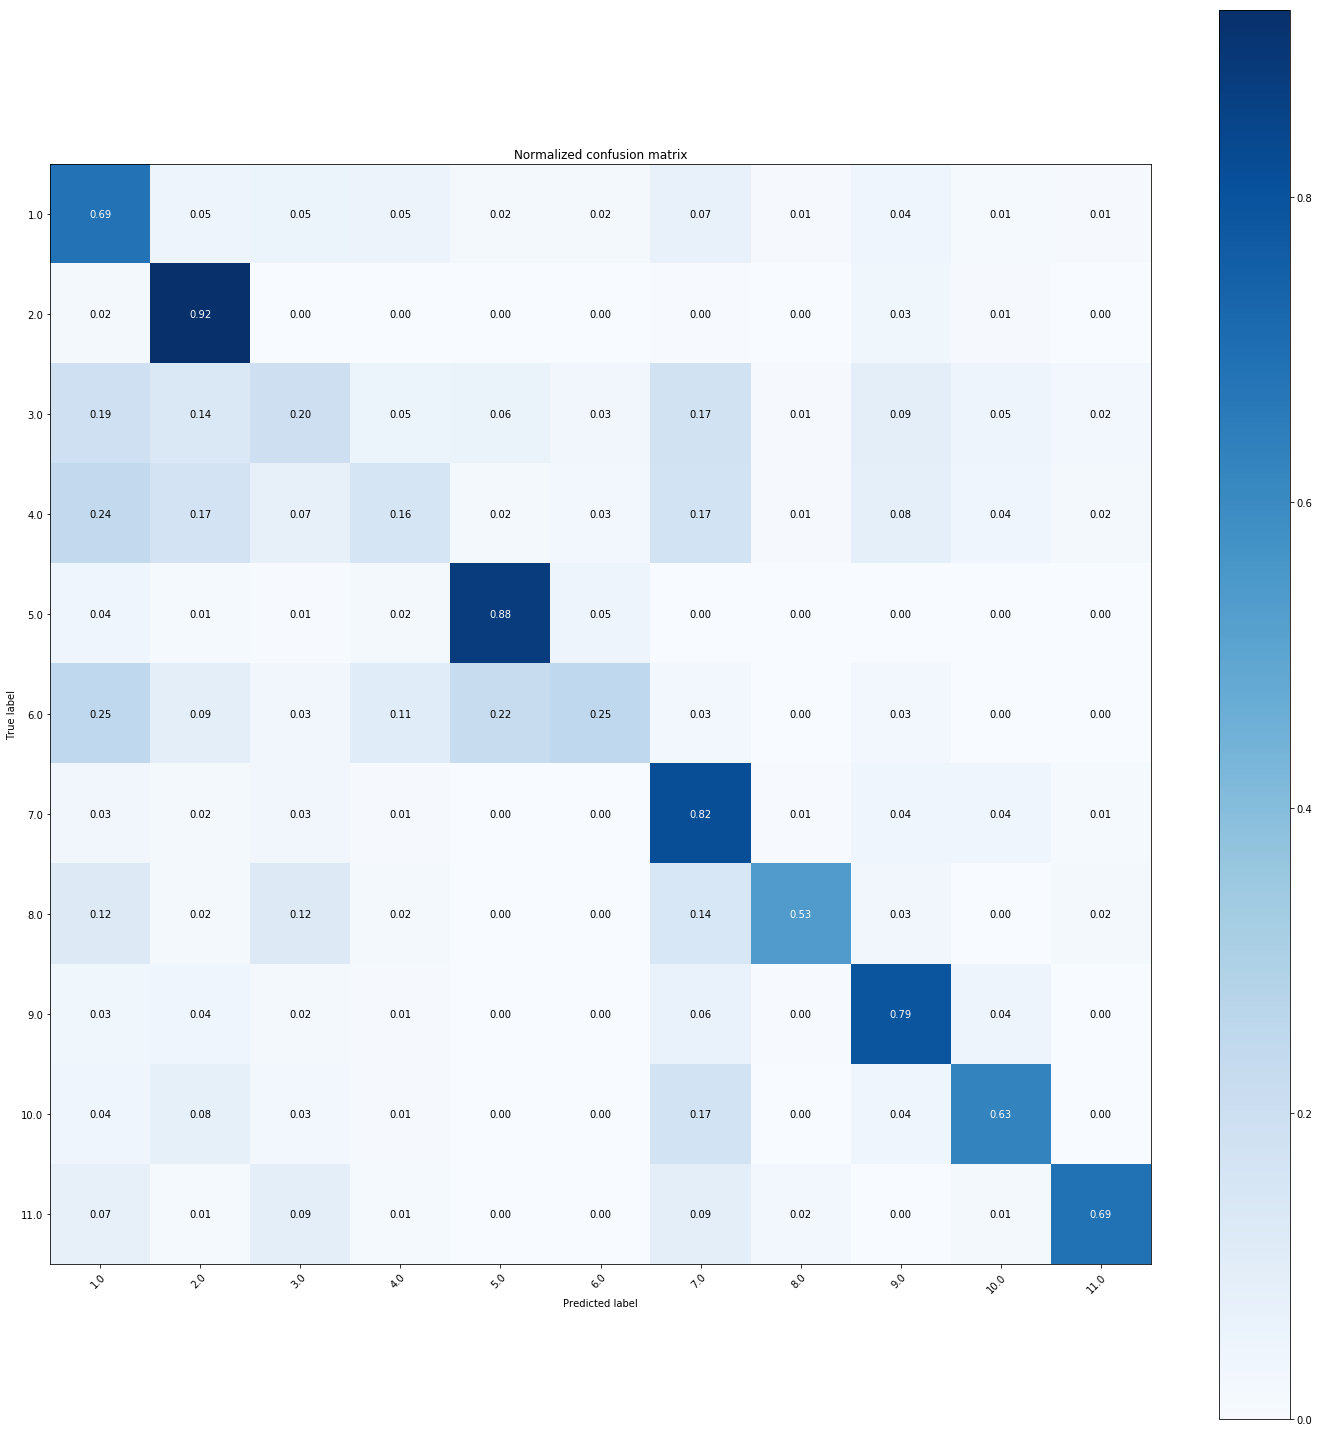

In [228]:
#valid confusion_matrix
valid_tmp = valid_df.copy()
valid_tmp['pre_label'] = y_valid
valid_tmp['pre_label'] = valid_tmp['pre_label'] / valid_tmp['plan_order']
valid_tmp['pre_label_order'] = valid_tmp.groupby('sid')['pre_label'].rank(method='min',ascending=False)
valid_true = valid_tmp[valid_tmp['label']==1]['transport_mode']
valid_pred = valid_tmp[valid_tmp['pre_label_order']==1]['transport_mode']  
f1_value_1 = f1_score(valid_true.values,valid_pred.values,average='weighted')
print (f1_value_1)
mat = plot_confusion_matrix(valid_true.values, valid_pred.values, classes_name=np.sort(valid_true.unique()), normalize=True,
                      title='Normalized confusion matrix')

In [229]:
#测试结果后处理 0424
process_mode =[1,7,4,3,6]
process_weight = [0.8,0.8,3,3,2]
for i in range(len(process_mode)):
    valid_tmp.loc[valid_tmp[valid_tmp['transport_mode']==process_mode[i]].index,'pre_label'] = valid_tmp['pre_label']* process_weight[i]
valid_tmp

NameError: name 'testDF' is not defined

0.7391082872368235
Normalized confusion matrix
[[6.42506928e-01 4.37717615e-02 9.38676899e-02 6.97790095e-02
  1.61301784e-02 2.20279969e-02 5.84807788e-02 5.68464435e-03
  3.21182406e-02 8.52696653e-03 7.10580544e-03]
 [1.80232984e-02 9.15781376e-01 8.27899480e-03 9.08491465e-03
  1.53857425e-03 2.01479962e-03 4.17613012e-03 4.76225364e-04
  3.14675068e-02 8.82848560e-03 3.29694483e-04]
 [1.52893401e-01 1.30761421e-01 2.80406091e-01 6.70050761e-02
  5.78680203e-02 2.82233503e-02 1.47614213e-01 6.90355330e-03
  7.10659898e-02 3.97969543e-02 1.74619289e-02]
 [2.07457358e-01 1.56683856e-01 1.27727092e-01 2.05077350e-01
  1.42800476e-02 2.65767553e-02 1.45577152e-01 5.95001983e-03
  6.50535502e-02 3.49067830e-02 1.07100357e-02]
 [3.58045493e-02 1.16891323e-02 7.26621735e-03 2.37994945e-02
  8.73420388e-01 4.61246841e-02 8.42459983e-04 0.00000000e+00
  9.47767481e-04 0.00000000e+00 1.05307498e-04]
 [2.28499157e-01 9.10623946e-02 4.04721754e-02 1.14249578e-01
  2.17537943e-01 2.51264755e-01

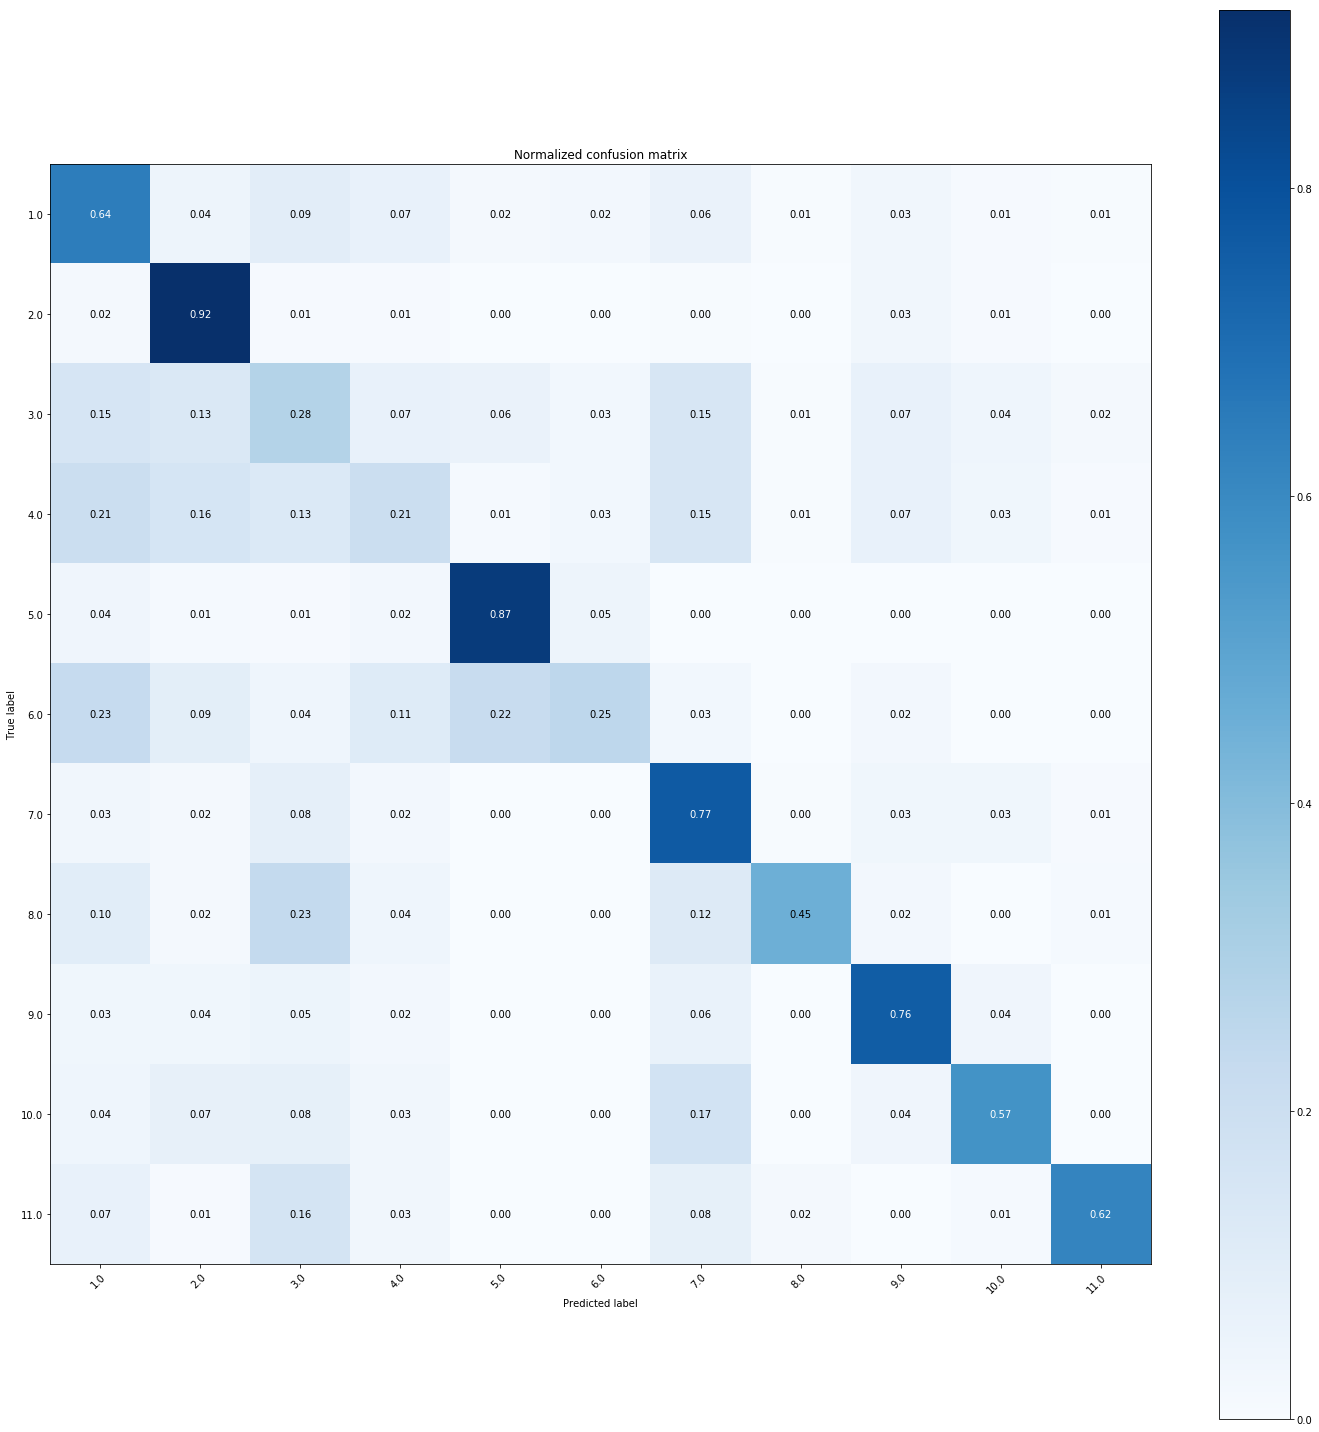

In [230]:
valid_tmp['pre_label_order'] = valid_tmp.groupby('sid')['pre_label'].rank(method='min',ascending=False)
valid_true = valid_tmp[valid_tmp['label']==1]['transport_mode']
valid_pred = valid_tmp[valid_tmp['pre_label_order']==1]['transport_mode']  
f1_value_1 = f1_score(valid_true.values,valid_pred.values,average='weighted')
print (f1_value_1)
mat = plot_confusion_matrix(valid_true.values, valid_pred.values, classes_name=np.sort(valid_true.unique()), normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
#测试结果后处理 0423
testDF = test_bi[['sid','transport_mode','plan_order']]
testDF['bi_pred'] = pd.Series(test_preds)
testDF

In [ ]:
#结果后处理2
testDF['mode_pred'] = testDF['bi_pred'] /testDF['plan_order'] 
testDF['pre_label_order'] = testDF.groupby('sid')['mode_pred'].rank(method='min',ascending=False)
testDF[testDF['pre_label_order']==1]['transport_mode'].value_counts().plot(kind='bar')

In [ ]:
#分组取概率最大的model
testDF['pre_label_order'] = testDF.groupby('sid')['pre_label'].rank(method='min',ascending=False)
test_out = testDF[testDF['pre_label_order']==1][['sid','transport_mode','pre_label','pre_label_order']]
test_out['transport_mode'].value_counts()

In [481]:
np.zeros((5, 12))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### 模型数据_多分类

In [473]:
dup_sample = train_multi[train_multi['label'].isin([3,4,6])].reset_index(drop=True)
train_multi = train_multi.append(dup_sample)
# train_multi = train_multi.sort_values(by='plan_time')
train_multi.shape

(549095, 516)

In [476]:
def f1_weighted(labels,preds):
    preds = np.argmax(preds.reshape(12, -1), axis=0)
    score = f1_score(y_true=labels, y_pred=preds, average='weighted')
    return 'f1_weighted', score, True

In [477]:
train_index = (train_multi.plan_time < '2018-11-23')
train_x     = train_multi[train_index].iloc[:,2:-1].reset_index(drop=True)
train_y     = train_multi[train_index].label.reset_index(drop=True)

valid_index = (train_multi.plan_time > '2018-11-23') & (train_multi.plan_time < '2018-12-01')
valid_x     = train_multi[valid_index].iloc[:,2:-1].reset_index(drop=True)
valid_y     = train_multi[valid_index].label.reset_index(drop=True)

test_x     = test.iloc[2:,:]

print(train_x.shape, valid_x.shape)
lgb_model = lgb.LGBMClassifier(boosting_type="gbdt", num_leaves=61, reg_alpha=0, reg_lambda=0.01,
    max_depth=-1, n_estimators=2000, objective='multiclass',
    subsample=0.8, colsample_bytree=0.8, subsample_freq=1,min_child_samples = 50,  learning_rate=0.05, random_state=2019)
eval_set = [(valid_x, valid_y)]
lgb_model.fit(train_x, train_y, eval_set=eval_set, eval_metric=f1_weighted,categorical_feature=['pid'], verbose=100, early_stopping_rounds=100)

(472276, 513) (67873, 513)


/home/cwl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's f1_weighted: 0.612618
[200]	valid_0's f1_weighted: 0.612965
Early stopping, best iteration is:
[142]	valid_0's f1_weighted: 0.613921


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        metric='None', min_child_samples=50, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=61,
        objective='multiclass', random_state=2019, reg_alpha=0,
        reg_lambda=0.01, silent=True, subsample=0.8,
        subsample_for_bin=200000, subsample_freq=1)

In [ ]:
# lgb 参数
lgb_params = {
    "learning_rate": 0.05,
    "lambda_l1": 0.1,
    "lambda_l2": 0.2,
    "max_depth": -1,
    "num_leaves": 80,
    "objective": "multiclass",
    "num_class": 12,
    "verbose": -1,
    'feature_fraction': 0.8,
    "min_split_gain": 0.1,
    "boosting_type": "gbdt",
    "subsample": 0.8,
    "min_data_in_leaf": 50,
    "colsample_bytree": 0.8,
#     "colsample_bylevel": 0.7,
    "tree_method": 'exact'
}

In [329]:
def f1_score_vail(y_prtmped,data_vail):
    labels = data_vail.get_label()
    f1_list = f1_score(labels,np.argmax(y_prtmped.reshape(12, -1), axis=0),average='weighted')  
    return 'f1_score', f1_list, True

In [479]:
skf = StratifiedKFold(n_splits=5, random_state=2301, shuffle=True)
X_train = train_multi.iloc[:,2:-1]
y_train = train_multi.iloc[:,-1]
f1_values = []
for index, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    print('index:',index)
    train_lgb_data = lgb.Dataset(X_train.iloc[train_index], label=y_train.iloc[train_index])
    validation_lgb_data = lgb.Dataset(X_train.iloc[test_index], label=y_train.iloc[test_index])
    
    clf = lgb.train(lgb_params, 
                    train_lgb_data,
                    feval=f1_score_vail,
                    num_boost_round=1000, 
                    valid_sets=[train_lgb_data, validation_lgb_data],
                    early_stopping_rounds=100,
                    verbose_eval=100)
    f1_values.append(clf.best_score['valid_1']['f1_score'])
    print('f1_values:\n',f1_values)
    
    #验证集混淆矩阵
#     y_valid = clf.predict(X_train.iloc[test_index],num_iteration=clf.best_iteration)
#     y_valid = [np.argmax(x) for x in y_valid]
#     plot_confusion_matrix(y_train.iloc[test_index].values, y_valid, classes_name=np.sort(train['label'].unique()), normalize=True,
#                       title='Normalized confusion matrix')
    
    #预测集
    y_test = clf.predict(test_multi, num_iteration=clf.best_iteration)  # 预测
    if index == 0:
        test_preDF = pd.DataFrame(y_test,index=test_multi['sid'].values)
    else:
        test_preDF = pd.concat([test_preDF,pd.DataFrame(y_test,index=test_multi['sid'].values)],axis=0)

index: 0


/home/cwl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training until validation scores don't improve for 100 rounds.
[100]	training's multi_logloss: 0.956563	training's f1_score: 0.645261	valid_1's multi_logloss: 1.02314	valid_1's f1_score: 0.629983
[200]	training's multi_logloss: 0.870307	training's f1_score: 0.66302	valid_1's multi_logloss: 0.983036	valid_1's f1_score: 0.63525
[300]	training's multi_logloss: 0.816662	training's f1_score: 0.680232	valid_1's multi_logloss: 0.968299	valid_1's f1_score: 0.638785
[400]	training's multi_logloss: 0.770719	training's f1_score: 0.698298	valid_1's multi_logloss: 0.956057	valid_1's f1_score: 0.642633
[500]	training's multi_logloss: 0.729572	training's f1_score: 0.716294	valid_1's multi_logloss: 0.944611	valid_1's f1_score: 0.646394
[600]	training's multi_logloss: 0.692265	training's f1_score: 0.733918	valid_1's multi_logloss: 0.93397	valid_1's f1_score: 0.650973
[700]	training's multi_logloss: 0.657892	training's f1_score: 0.750711	valid_1's multi_logloss: 0.924068	valid_1's f1_score: 0.655387
[80

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields plan_time

Normalized confusion matrix
[[2.31783112e-01 1.89241320e-01 1.52700386e-01 1.93956279e-02
  1.92884698e-03 1.07158165e-01 1.36090870e-02 1.45092156e-01
  2.35747964e-03 8.45477925e-02 3.66480926e-02 1.55379340e-02]
 [3.41078661e-03 7.52078448e-01 5.44304697e-02 1.23641015e-02
  1.13692887e-03 2.34491580e-02 1.21509273e-02 7.08448803e-02
  2.84232218e-03 4.54771548e-02 1.15824629e-02 1.02323598e-02]
 [1.46530881e-04 1.34808411e-02 9.34610594e-01 7.32654407e-05
  1.09898161e-04 2.27122866e-03 5.12858085e-04 3.48010843e-03
  0.00000000e+00 3.69257821e-02 7.98593304e-03 4.02959924e-04]
 [1.05583756e-02 2.55431472e-01 1.48832487e-01 1.04568528e-01
  2.03045685e-03 6.25380711e-02 1.74619289e-02 2.15837563e-01
  4.46700508e-03 1.03959391e-01 4.79187817e-02 2.63959391e-02]
 [1.86433955e-02 3.66917890e-01 1.79293931e-01 2.49900833e-02
  9.52003173e-03 3.13367711e-02 1.26933756e-02 1.90003967e-01
  3.57001190e-03 9.99603332e-02 4.08568029e-02 2.22134074e-02]
 [3.47514743e-03 4.34919966e-02 1.621

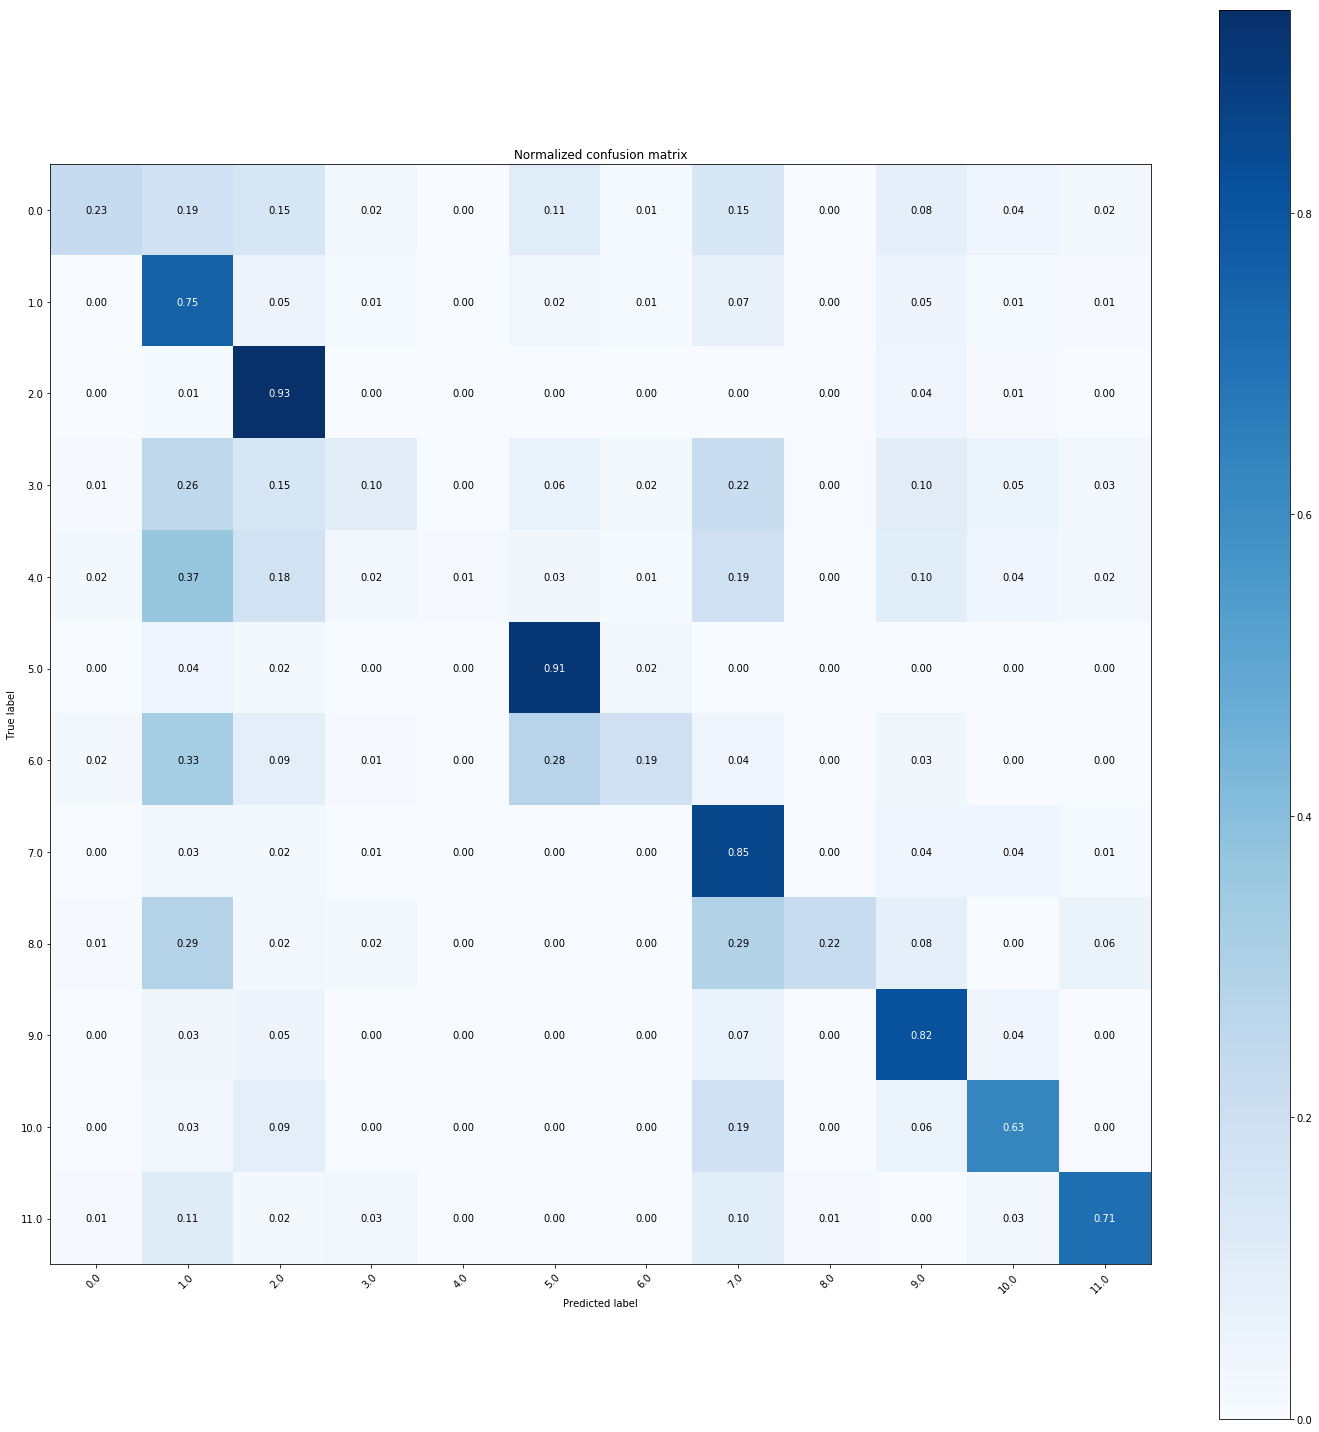

In [435]:
y_valid = clf.predict(X_train.iloc[test_index],num_iteration=clf.best_iteration)
y_valid = [np.argmax(x) for x in y_valid]
plot_confusion_matrix(y_train.iloc[test_index].values, y_valid, classes_name=np.sort(train_multi['label'].unique()), normalize=True,
                  title='Normalized confusion matrix')

In [456]:
train_multi['label'].value_counts()
# train_multi[train_multi['label'].isin([3,4,6,8])]
# train_multi[['eta_1','plan_list_doc_6_1']]

2.0     136491
7.0      78209
1.0      70369
9.0      48864
5.0      47480
0.0      46664
3.0      24626
10.0     14882
4.0      12606
6.0      11863
11.0      6089
8.0       1857
Name: label, dtype: int64

In [449]:
# train[(train['label']==1) & (train['transport_mode'].isin([3,4,6,8]))]['plan_order'].value_counts()
train[(train['label']==1) & (train['transport_mode'].isin([3]))]['plan_order'].value_counts()

2.0    17859
1.0     5747
3.0      985
4.0       33
5.0        2
Name: plan_order, dtype: int64

In [304]:
feature_df = pd.DataFrame()
feature_df['feature'] = train_multi.columns[:-1]
feature_df['importance'] = clf.feature_importance(importance_type='gain')
feature_df.sort_values(by='importance',ascending=False).to_csv('outdata/feature_importance_item2vec_mult.csv',index=None)
feature_df.sort_values(by='importance',ascending=False)

,feature,importance
148,sid_transport_mode_emb_3_1,1.828057e+06
139,transport_mode_distance_max_1,8.401035e+05
150,sid_transport_mode_emb_5_1,6.624065e+05
116,transport_mode_1,6.583539e+05
113,distance_1,5.817264e+05
126,transport_mode_speed_median_1,4.854614e+05
125,transport_mode_speed_min_1,4.187452e+05
146,sid_transport_mode_emb_1_1,2.452073e+05
147,sid_transport_mode_emb_2_1,2.436567e+05
128,transport_mode_speed_mean_1,2.234256e+05


In [371]:
test_pred = test_preDF.reset_index().groupby('index').mean()

In [372]:
#多分类预测结果输出
mode_re = pd.DataFrame(index=test_multi['sid'].drop_duplicates().values)
mode_re['pred_mode'] =test_pred.apply(lambda x:np.argmax(x.values),axis=1)
mode_re

,pred_mode
1126541,2
453685,1
2066073,7
452746,2
1431672,5
1362848,1
2043270,5
1404698,2
1365075,1
1344781,1


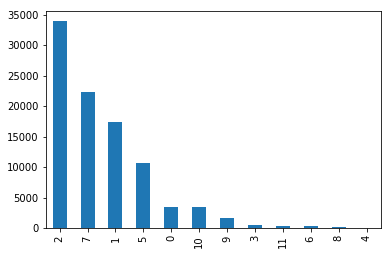

In [373]:
mode_re['pred_mode'].value_counts().plot(kind='bar')

In [374]:
#多分类预测结果
mult_pred = pd.DataFrame()
for i in  range(1,12):
    tmp = test_pred[[i]].rename(columns={i:'mult_pred'})
    tmp['transport_mode'] = [i]*test_pred.shape[0]
    mult_pred = pd.concat([mult_pred,tmp],axis=0)
    print(mult_pred.shape)
mult_pred = mult_pred.reset_index().rename(columns={'index':'sid'})
mult_pred

(94358, 2)
(188716, 2)
(283074, 2)
(377432, 2)
(471790, 2)
(566148, 2)
(660506, 2)
(754864, 2)
(849222, 2)
(943580, 2)
(1037938, 2)


,sid,mult_pred,transport_mode
0,420123,1.194736e-01,1
1,420125,9.728721e-02,1
2,420127,1.059686e-01,1
3,420129,8.230886e-02,1
4,420134,2.789191e-02,1
5,420144,5.134906e-02,1
6,420145,4.149975e-03,1
7,420146,4.226825e-02,1
8,420149,4.162093e-03,1
9,420150,2.823487e-02,1


(429803, 6)

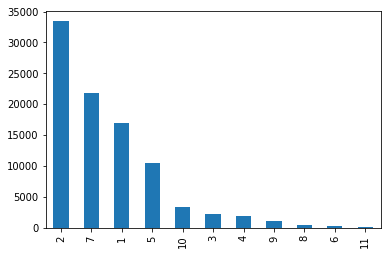

In [375]:
mult_pred_new = mult_pred.merge(test_bi[['sid','transport_mode','plan_order']],how='left',on=['sid','transport_mode'])
mult_pred_new = mult_pred_new[mult_pred_new['plan_order'].notnull()]
#后处理
mult_pred_new['mode_pred'] = mult_pred_new['mult_pred'] / mult_pred_new['plan_order']
mult_pred_new['mode_pred_order'] =  mult_pred_new.groupby('sid')['mode_pred'].rank(method='min',ascending=False)
mult_pred_new[mult_pred_new['mode_pred_order']==1]['transport_mode'].value_counts().plot(kind='bar')
mult_pred_new.shape

In [376]:
#后处理结果输出
result = mult_pred_new[mult_pred_new['mode_pred_order']==1][['sid','transport_mode']].rename(columns={'transport_mode':'recommend_mode'})
result.to_csv('submission/submission20190515_1.csv',index=None)

### 数据探索性分析

In [11]:
def gen_features():
    train_query,test_query,query,query_feature = gen_query_feature()
    df_plan,plan_feature,rank_feature,statis_feature,time_feature = gen_plan_feature()
    user = gen_profile_feature()
    user_feature = list(user.columns[1:])
    
    data = query.merge(df_plan, how='left', on='sid')
    
    #extract personal statistical feature
    data,sts_feature = gen_pid_statis(data)
    statis_feature = statis_feature + sts_feature   
    
    #merge
    data = data.merge(user, how='left', on='pid')
    return (data,query_feature,plan_feature,rank_feature,statis_feature,time_feature,user_feature)

def gen_binary_samples():
    datas =  gen_features()
    data = datas[0]
    
    #train_data
    train_query = pd.read_csv("data/train_queries.csv", usecols =['sid'])    
    click = pd.read_csv("data/train_clicks.csv", usecols =['sid','click_mode'])    
    train = train_query.merge(data, how='left', on='sid')
    train = train.merge(click, how='left', on='sid')
    #add binary label: 第一个与click_mode匹配的transport_mode
    indexs = train[train['transport_mode']==train['click_mode']].groupby(['sid']).head(1).index
    train.loc[indexs,'label']=1
    train['label'].fillna(0,inplace =True)
    train.to_csv('outdata/train.csv',index=None)
    
    #test data
    test_query = pd.read_csv("data/test_queries.csv", usecols =['sid'])
    test = test_query.merge(data, how='left', on='sid')
    test = test[test['plan_time'].notnull()]   #无plans的测试数据，不做预测
    test = test.reset_index(drop=True)
    test.to_csv('outdata/test.csv',index=None)
    
    #features
    print ('query_feature:\n',datas[1])
    print ('plan_feature:\n',datas[2])
    print ('rank_feature:\n',datas[3])
    print ('statis_feature:\n',datas[4])
    print ('time_feature:\n',datas[5])
    print ('user_feature:\n',datas[6])
    return train,test
train,test  = gen_binary_samples()

In [57]:
tmp = test[test['plan_order']==1]['transport_mode'].value_counts()*1.0/test[test['plan_order']==1].shape[0]
tmp.values

array([3.56742392e-01, 2.23180046e-01, 1.77236932e-01, 1.12216569e-01,
       5.31483942e-02, 3.51730023e-02, 3.21699020e-02, 5.48767973e-03,
       4.20217995e-03, 4.21298247e-04, 2.16050383e-05])

In [25]:
#特征唯一性分析
cols =['sid','pid','o_x','o_y','d_x','d_y','distance']
for col in cols:
    print(len(train[col].unique()))
train.isnull().sum()
train.nunique()

491054
45247
176
135
185
132
84529


sid                              491054
pid                               45246
o_x                                 176
o_y                                 135
d_x                                 185
d_y                                 132
ED                                 9280
plan_day                             31
plan_hour                            24
plan_weekday                          7
plan_num                              7
distance                          84529
eta                               15746
price                               541
transport_mode                       11
plan_order                            7
speed                           1867422
transport_mode_distance_mean         11
transport_mode_distance_std          11
transport_mode_distance_min           8
transport_mode_distance_25%          11
transport_mode_distance_50%          11
transport_mode_distance_75%          11
transport_mode_distance_max           9
transport_mode_eta_mean              11


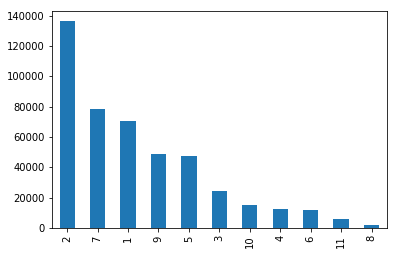

In [26]:
#标签分布统计
click['click_mode'].value_counts().plot(kind='bar')

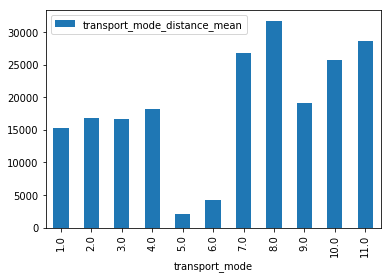

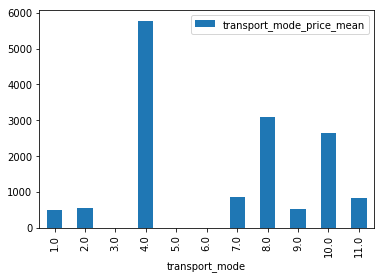

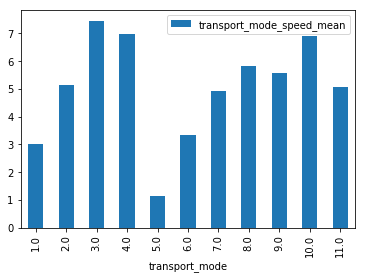

In [30]:
#出行方式的距离，价格，速度分析
tmp = train[['transport_mode','transport_mode_distance_mean']].drop_duplicates().sort_values(['transport_mode'])
tmp.plot(kind='bar',x='transport_mode',y='transport_mode_distance_mean')
tmp = train[['transport_mode','transport_mode_price_mean']].drop_duplicates().sort_values(['transport_mode'])
tmp.plot(kind='bar',x='transport_mode',y='transport_mode_price_mean')
tmp = train[['transport_mode','transport_mode_speed_mean']].drop_duplicates().sort_values(['transport_mode'])
tmp.plot(kind='bar',x='transport_mode',y='transport_mode_speed_mean')

In [35]:
#出发地，目的地对应出行方式分析
tmp = train[train['label']==1][['o_x','o_y','d_x','d_y','transport_mode','distance','eta','price','speed']]
tmp['o'] = tmp[['o_x','o_y']].apply(lambda x:str(x['o_x'])+str(x['o_y']),axis=1)
tmp['d'] = tmp[['d_x','d_y']].apply(lambda x:str(x['d_x'])+str(x['d_y']),axis=1)
tmp['o'].value_counts()

116.4139.91    5219
116.3739.86    5124
116.3239.89    5085
116.4239.9     5069
116.3739.91    4940
116.439.91     4803
116.3939.9     4076
116.3539.94    3463
116.3939.91    2829
116.4139.9     2811
116.3139.98    2791
116.3939.89    2763
116.3939.94    2655
116.439.93     2504
116.4339.94    2463
116.3139.89    2408
116.4739.91    2372
116.4139.92    2358
116.3939.92    2308
116.4539.91    2250
116.3339.99    2247
116.4539.93    2236
116.340.05     2117
116.4539.92    2053
116.3539.91    1921
116.3239.9     1892
116.3739.95    1857
116.4239.84    1784
116.4339.92    1732
116.3940.0     1722
               ... 
116.0339.61       1
116.4640.15       1
116.2539.72       1
116.5240.28       1
115.9439.75       1
115.9440.52       1
116.3340.16       1
116.6640.65       1
115.8340.05       1
117.0740.28       1
116.9540.15       1
116.7839.76       1
116.6739.81       1
115.8939.82       1
116.5240.2        1
116.4440.45       1
115.9339.81       1
116.6940.38       1
116.0940.24       1


In [36]:
tmp['d'].value_counts()

116.3239.89    15232
116.3739.86    11594
116.4239.9     10434
116.3939.9      7036
116.3939.91     6913
116.4139.91     5850
116.3739.91     5172
116.4539.93     4966
116.2740.0      3950
116.439.93      3535
116.3939.92     3432
116.3139.98     3167
116.1839.99     3147
116.040.35      3114
116.439.91      2896
116.3939.99     2737
116.3839.94     2648
116.5940.08     2564
116.3939.89     2496
116.4139.9      2456
116.3339.99     2349
116.4939.98     2319
116.3339.94     2302
116.4539.91     2249
116.640.08      2239
116.4339.94     2171
116.4739.91     2165
116.4539.92     2091
116.3939.94     2079
116.3539.94     1915
               ...  
116.5140.24        1
116.6340.08        1
116.0340.06        1
115.740.05         1
116.8840.47        1
116.2340.02        1
117.2740.17        1
116.8239.69        1
116.039.6          1
117.3140.19        1
116.7239.66        1
115.9340.36        1
116.1439.97        1
116.2240.49        1
116.3440.13        1
116.1439.88        1
115.7239.84  

In [46]:
tmp[tmp['o']=='116.3739.86']['speed'].value_counts()

500.0      1210
400.0      1121
600.0       562
700.0       508
0.0         471
300.0       353
800.0       184
200.0       103
900.0        98
3000.0       82
1800.0       39
1000.0       32
1100.0       25
2000.0       22
1700.0       21
1300.0       20
1200.0       20
2200.0       19
2100.0       16
1900.0       15
2600.0       11
2800.0       11
1400.0       10
2400.0        9
3600.0        8
2300.0        8
2700.0        8
3700.0        8
3400.0        7
3500.0        6
           ... 
6600.0        2
10500.0       1
5400.0        1
7300.0        1
7000.0        1
13600.0       1
8600.0        1
24600.0       1
13200.0       1
6900.0        1
19400.0       1
7200.0        1
8200.0        1
7900.0        1
6400.0        1
12400.0       1
5900.0        1
12700.0       1
6300.0        1
9800.0        1
4000.0        1
6700.0        1
5800.0        1
7600.0        1
9300.0        1
43300.0       1
8100.0        1
14800.0       1
8900.0        1
11100.0       1
Name: price, Length: 87,

In [ ]:
#plan order 
train[train['label']==1]['plan_order'].value_counts().sort_index().plot(kind='bar')
train[train['label']==1]['plan_order'].value_counts()/train[train['label']==1].shape[0]*1.0

In [ ]:
#iv值
ivs = calc_ivs(train)
# pd.DataFrame.from_dict([ivs]).T
pd.DataFrame.from_dict([ivs]).T.sort_values(0,ascending=False)
#woe
woe_df = calc_woe(train,'plan_order')
woe_df

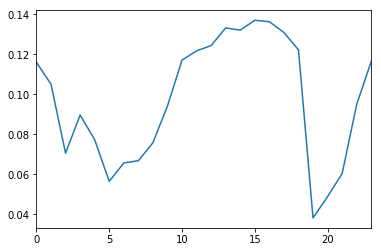

In [47]:
#不同时刻选择某种交通方式的概率
tmp_label =train[train['label']==1]
tmp = tmp_label[tmp_label['transport_mode']==9]['plan_hour'].value_counts().sort_index()*1.0 / tmp_label['plan_hour'].value_counts().sort_index()
tmp.plot()

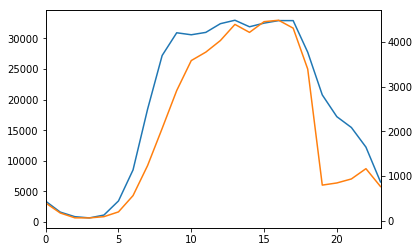

In [46]:
tmp_label['plan_hour'].value_counts().sort_index().plot()
tmp_label[tmp_label['transport_mode']==9]['plan_hour'].value_counts().sort_index().plot(secondary_y=True)

In [450]:
[float(x) for x in train['o'].iloc[0].split(',')]

[116.29, 39.97]

In [324]:
train['price'].value_counts()

         814355
500      167512
200      151633
400      148350
600      111474
700       96135
300       77730
800       49488
1300      48557
900       34252
1800      24406
1700      20821
1000      17529
1900      16280
2000      14246
3000      12542
2900      11565
2100      11433
1100      11360
1500      11294
2200      11240
1400      10962
3200      10514
2700      10449
2500      10442
1600      10240
3100      10176
2300      10098
2800       9904
2400       9486
          ...  
37500         1
39700         1
41600         1
43100         1
43800         1
44500         1
46200         1
46800         1
47500         1
47600         1
47900         1
48000         1
48300         1
48700         1
48800         1
48900         1
49900         1
50100         1
50200         1
50300         1
50600         1
50800         1
51000         1
51100         1
51200         1
51300         1
51600         1
52300         1
52500         1
92300         1
Name: price, Length: 541

In [347]:
train.groupby(['sid'])['eta'].rank(method='first')

0          4.0
1          1.0
2          2.0
3          3.0
4          5.0
5          6.0
6          4.0
7          1.0
8          2.0
9          3.0
10         5.0
11         4.0
12         1.0
13         2.0
14         3.0
15         5.0
16         6.0
17         7.0
18         3.0
19         1.0
20         2.0
21         4.0
22         5.0
23         3.0
24         1.0
25         2.0
26         4.0
27         1.0
28         2.0
29         3.0
          ... 
2285737    1.0
2285738    2.0
2285739    3.0
2285740    5.0
2285741    3.0
2285742    1.0
2285743    2.0
2285744    4.0
2285745    5.0
2285746    1.0
2285747    2.0
2285748    3.0
2285749    4.0
2285750    6.0
2285751    3.0
2285752    1.0
2285753    2.0
2285754    4.0
2285755    5.0
2285756    6.0
2285758    1.0
2285759    1.0
2285760    2.0
2285761    3.0
2285762    4.0
2285763    2.0
2285764    1.0
2285765    3.0
2285766    4.0
2285767    5.0
Name: eta, Length: 2276822, dtype: float64

In [320]:
train.groupby(['transport_mode'])['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
transport_mode,,,,,,,,
1.0,331795.0,15435.580319,17215.573531,353.0,4135.00,9740.0,19994.00,225106.0
2.0,207019.0,16848.614572,11574.214711,859.0,8243.00,14177.0,22648.00,92247.0
3.0,477118.0,16741.178507,15917.537551,1.0,5113.00,12760.0,23453.00,222045.0
4.0,433568.0,18197.494937,15771.703702,1.0,6984.00,14318.0,24718.00,222045.0
5.0,132812.0,2064.065220,1475.367240,1.0,751.00,1783.0,3294.00,5000.0
6.0,196602.0,4209.708462,3001.450461,1.0,1397.00,3813.0,6787.75,10000.0
7.0,237309.0,26900.203309,18386.235293,1754.0,13903.00,22574.0,34707.00,225864.0
8.0,12330.0,31748.252879,22488.094924,6135.0,16369.25,24306.5,39908.75,182949.0
9.0,135523.0,19149.596954,10886.420626,2294.0,11196.00,16721.0,24484.00,90860.0


In [279]:
train[train['label']==1].groupby(['transport_mode'])['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
transport_mode,,,,,,,,
1.0,70369.0,14607.217937,17326.042853,412.0,4190.0,8197.0,17452.00,202734.0
2.0,136491.0,16647.638958,11396.711267,859.0,8225.0,13941.0,22286.00,92247.0
3.0,24626.0,21041.071104,21334.267254,1.0,6325.0,15057.5,28374.00,195277.0
4.0,12606.0,15957.958908,15933.923459,1.0,5117.0,10976.5,21356.75,191676.0
5.0,47480.0,761.401474,647.062245,1.0,318.0,634.0,1001.00,4998.0
6.0,11863.0,2881.374020,2199.210425,1.0,1335.0,2162.0,3836.00,9998.0
7.0,78209.0,29675.256850,20071.199159,1852.0,15112.0,25062.0,38542.00,205188.0
8.0,1857.0,37099.593430,29376.282712,6558.0,17042.0,26774.0,49110.00,182949.0
9.0,48864.0,19339.849726,11093.475413,2552.0,11151.0,16830.0,24952.75,88262.0


In [262]:
train.groupby(['transport_mode'])['eta'].describe()
train[train['label']==1].groupby(['transport_mode'])['eta'].describe()

,count,mean,std,min,25%,50%,75%,max
transport_mode,,,,,,,,
1.0,331795.0,4129.286050,2599.863092,445.0,2128.00,3523.0,5512.0,72992.0
2.0,207019.0,3037.887353,1336.119840,270.0,2053.00,2841.0,3813.0,11083.0
3.0,477118.0,2001.056217,1397.636325,1.0,927.00,1809.0,2812.0,14529.0
4.0,433568.0,2352.325474,1346.560189,1.0,1355.00,2149.0,3112.0,14769.0
5.0,132812.0,1849.051426,1327.443526,1.0,666.00,1595.0,2956.0,4708.0
6.0,196602.0,1271.369793,907.789885,1.0,421.00,1151.0,2051.0,3027.0
7.0,237309.0,5039.303583,2172.225372,1060.0,3493.00,4598.0,6087.0,72638.0
8.0,12330.0,5090.998216,1758.704656,1626.0,3786.25,4730.0,6033.0,15726.0
9.0,135523.0,3254.797031,1191.126475,785.0,2388.00,3076.0,3932.0,10432.0


In [263]:
train.groupby(['transport_mode'])['price'].describe()
train[train['label']==1].groupby(['transport_mode'])['price'].describe()

,count,unique,top,freq
transport_mode,,,,
1.0,331795,77,200,151633
2.0,207019,16,500,60513
3.0,477118,1,,477118
4.0,433568,534,1300,43976
5.0,132812,1,,132812
6.0,196602,1,,196602
7.0,237309,65,700,55958
8.0,12330,148,1600,1143
9.0,135523,17,500,47562


In [336]:
train.groupby(['o','d'])['transport_mode'].describe()

o             d           
115.47,39.78  115.98,39.69    1.200000e+01
115.49,39.98  116.49,39.91    8.400000e+01
115.50,40.03  116.43,39.87    8.400000e+01
115.50,40.04  116.42,39.99    1.320000e+02
115.51,39.93  116.30,39.88    8.400000e+01
115.56,40.00  115.55,40.02    3.600000e+02
115.57,39.99  115.59,40.05    1.200000e+01
115.58,39.78  116.32,39.89    6.720000e+02
115.59,39.63  115.59,39.63    9.000000e+01
              116.35,39.99    8.400000e+01
115.59,39.64  116.67,39.94    7.000000e+00
115.60,39.63  116.32,39.89    1.200000e+01
115.60,39.64  116.09,39.94    1.200000e+01
              116.42,39.90    8.400000e+01
              116.46,39.94    2.100000e+01
115.61,39.65  115.59,39.63    3.600000e+02
115.61,39.95  115.55,40.02    7.200000e+01
              116.35,40.04    8.400000e+01
115.62,39.94  115.64,39.97    1.200000e+01
115.63,39.75  115.74,39.73    3.000000e+00
115.63,39.83  115.93,39.69    9.600000e+01
115.66,39.63  116.46,39.89    6.720000e+02
115.66,39.97  116.08,39.95 

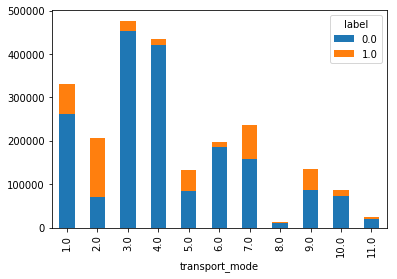

In [286]:
hourDF = train.groupby(['transport_mode', 'label'])['transport_mode'].count().unstack('label').fillna(0)
hourDF[[0,1]].plot(kind='bar', stacked=True)

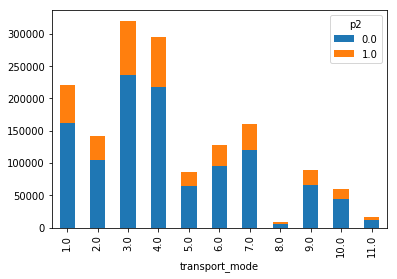

In [413]:
hourDF = train.groupby(['transport_mode', 'p2'])['transport_mode'].count().unstack('p2').fillna(0)
hourDF[[0,1]].plot(kind='bar', stacked=True)

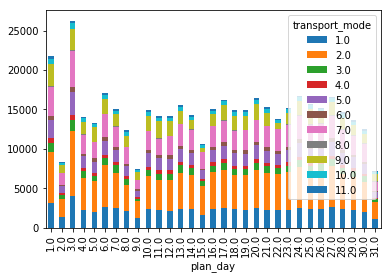

In [460]:
tmp = train[train['label']==1]
dayDF = tmp.groupby(['plan_day','transport_mode'])['plan_day'].count().unstack('transport_mode').fillna(0)
dayDF.plot(kind='bar', stacked=True)

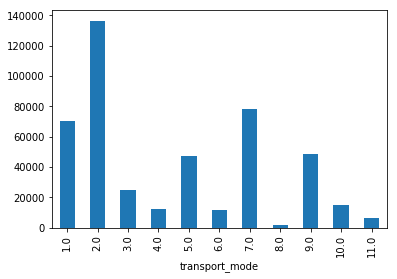

In [463]:
tmp.groupby(['transport_mode'])['transport_mode'].count().plot(kind='bar')

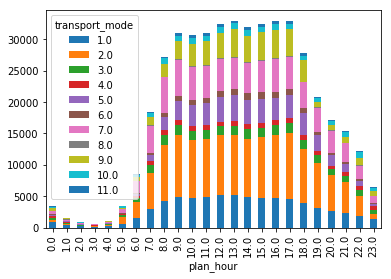

In [461]:
dayDF = tmp.groupby(['plan_hour','transport_mode'])['plan_hour'].count().unstack('transport_mode').fillna(0)
dayDF.plot(kind='bar', stacked=True)

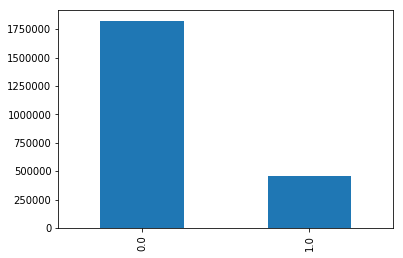

In [288]:
train['label'].value_counts().plot(kind='bar')

In [283]:
train.groupby(['transport_mode', 'label'])['transport_mode'].count().unstack('label')
train.groupby(['transport_mode', 'label'])['transport_mode'].count()

transport_mode  label
1.0             0.0      261426
                1.0       70369
2.0             0.0       70528
                1.0      136491
3.0             0.0      452492
                1.0       24626
4.0             0.0      420962
                1.0       12606
5.0             0.0       85332
                1.0       47480
6.0             0.0      184739
                1.0       11863
7.0             0.0      159100
                1.0       78209
8.0             0.0       10473
                1.0        1857
9.0             0.0       86659
                1.0       48864
10.0            0.0       72983
                1.0       14882
11.0            0.0       18792
                1.0        6089
Name: transport_mode, dtype: int64

In [290]:
train['price'].value_counts()

         814355
500      167512
200      151633
400      148350
600      111474
700       96135
300       77730
800       49488
1300      48557
900       34252
1800      24406
1700      20821
1000      17529
1900      16280
2000      14246
3000      12542
2900      11565
2100      11433
1100      11360
1500      11294
2200      11240
1400      10962
3200      10514
2700      10449
2500      10442
1600      10240
3100      10176
2300      10098
2800       9904
2400       9486
          ...  
37500         1
39700         1
41600         1
43100         1
43800         1
44500         1
46200         1
46800         1
47500         1
47600         1
47900         1
48000         1
48300         1
48700         1
48800         1
48900         1
49900         1
50100         1
50200         1
50300         1
50600         1
50800         1
51000         1
51100         1
51200         1
51300         1
51600         1
52300         1
52500         1
92300         1
Name: price, Length: 541

In [277]:
train[train['transport_mode']==5][['o','d','distance','eta','price','transport_mode']]
train[train['transport_mode']==5]['price'].values

array(['', '', '', ..., '', '', ''], dtype=object)

In [256]:
click[click['sid']==508311]

,sid,click_time,click_mode


In [148]:
train[['o','d','distance','eta','price','transport_mode','click_mode']]

,o,d,distance,eta,price,transport_mode,click_mode
0,"116.29,39.97","116.32,39.96",5219.0,1367.0,300,9.0,9.0
1,"116.29,39.97","116.32,39.96",4537.0,1035.0,,3.0,9.0
2,"116.29,39.97","116.32,39.96",4537.0,1095.0,2100,4.0,9.0
3,"116.29,39.97","116.32,39.96",4118.0,1243.0,,6.0,9.0
4,"116.29,39.97","116.32,39.96",5219.0,1679.0,300,2.0,9.0
5,"116.29,39.97","116.32,39.96",4046.0,3672.0,,5.0,9.0
6,"116.39,39.84","116.33,39.79",13864.0,3221.0,600,7.0,1.0
7,"116.39,39.84","116.33,39.79",11106.0,1122.0,,3.0,1.0
8,"116.39,39.84","116.33,39.79",11106.0,1362.0,2900,4.0,1.0
9,"116.39,39.84","116.33,39.79",13488.0,2315.0,400,9.0,1.0


In [235]:
tmp = train[train['label']==1]
tmp.shape

(453336, 84)

In [155]:
tmp.groupby('sid').count()

,pid,req_time,o,d,plan_time,plan_day,plan_hour,plan_num,plan_order,distance,...,p59,p60,p61,p62,p63,p64,p65,click_time,click_mode,label
sid,,,,,,,,,,,,,,,,,,,,,
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
21,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
25,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
34,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1
35,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
36,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
44,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
68,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1
69,0,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,2,2,2


In [164]:
df_plan.drop_duplicates().shape

(2706625, 10)

In [166]:
df_plan['transport_mode'].value_counts()

3     567019
4     515934
1     393982
7     281512
2     246624
6     234134
9     160854
5     158316
10    103237
11     29345
8      15668
Name: transport_mode, dtype: int64

In [169]:
click['click_mode'].value_counts()

2     136491
7      78209
1      70369
9      48864
5      47480
3      24626
10     14882
4      12606
6      11863
11      6089
8       1857
Name: click_mode, dtype: int64

In [182]:
train[(train['plan_order']==1) & (train['label']==1)].shape

(331782, 83)

In [173]:
plans[['plan_time','plan_weekday']]

,plan_time,plan_weekday
0,2018-11-04 11:45:04,6
1,2018-10-16 19:09:29,1
2,2018-11-25 15:05:22,6
3,2018-10-03 14:42:40,2
4,2018-10-05 19:52:37,4
5,2018-10-01 07:03:52,0
6,2018-10-22 11:45:20,0
7,2018-11-13 18:51:27,1
8,2018-11-26 12:43:56,0
9,2018-11-23 19:34:38,4


In [195]:
for sid ,data in train.groupby(['sid']):
    print(sid)
    print(data)
    break

2
        sid  pid             req_time             o             d  \
129957    2  NaN  2018-11-10 12:47:12  116.39,39.92  116.41,39.91   
129958    2  NaN  2018-11-10 12:47:12  116.39,39.92  116.41,39.91   
129959    2  NaN  2018-11-10 12:47:12  116.39,39.92  116.41,39.91   
129960    2  NaN  2018-11-10 12:47:12  116.39,39.92  116.41,39.91   
129961    2  NaN  2018-11-10 12:47:12  116.39,39.92  116.41,39.91   
129962    2  NaN  2018-11-10 12:47:12  116.39,39.92  116.41,39.91   

                 plan_time  plan_day  plan_hour  plan_weekday  plan_num  ...  \
129957 2018-11-10 12:47:12      10.0       12.0           6.0       6.0  ...   
129958 2018-11-10 12:47:12      10.0       12.0           6.0       6.0  ...   
129959 2018-11-10 12:47:12      10.0       12.0           6.0       6.0  ...   
129960 2018-11-10 12:47:12      10.0       12.0           6.0       6.0  ...   
129961 2018-11-10 12:47:12      10.0       12.0           6.0       6.0  ...   
129962 2018-11-10 12:47:12      10

In [612]:
# lgb 参数
lgb_params = {
    "objective": "binary",
    "subsample": 0.9,
    "subsample_freq": 1,
    "boosting_type": "gbdt",
    "num_leaves": 120,
    "max_depth": -1,   
    "reg_alpha": 3,
    "learning_rate": 0.05,
    "random_state": 1000,
    "n_estimators": 15000,
    "n_jobs": 16,
    "colsample_bytree": 0.77,
    "min_child_weight": 4,
    "min_child_samples": 5, 
    "min_split_gain": 0.01
}
fold_num = 5
skf = StratifiedKFold(n_splits=fold_num, random_state=2019, shuffle=True)
f1_value = []

def f1_score_vail(pred, data_vail):
    y_true = data_vail.get_label()
    y_pred = np.round(pred)      # scikits f1 doesn't like probabilities
    score_vail = f1_score(y_true, y_pred, average='weighted')
    return 'f1', score_vail, True

#以sid，transport_mode比例划分训练测试集
evals_result = {} 
train_sub = train[train['label']==1][['sid','transport_mode']]
for index, (train_index, valid_index) in enumerate(skf.split(train_sub, train_sub['transport_mode'])):
    print("flod_num:%d" %index)  
    train_df = train[train['sid'].isin(train_sub.iloc[train_index,0].values)]
    valid_df = train[train['sid'].isin(train_sub.iloc[valid_index,0].values)]
    train_data = lgb.Dataset(train_df.iloc[:,:-1], label=train_df.iloc[:,-1])  # 训练数据
    valid_data = lgb.Dataset(valid_df.iloc[:,:-1], label=valid_df.iloc[:,-1])  # 验证数据
    lgb_model = lgb.train(lgb_params, train_data, num_boost_round=500, valid_sets =[valid_data],
                          early_stopping_rounds=100, feval=f1_score_vail, verbose_eval=20,
                          evals_result=evals_result) 
    #验证
    y_valid = lgb_model.predict(valid_df.iloc[:,:-1], num_iteration=lgb_model.best_iteration)
    y_valid = np.round(y_valid)
    f1_value.append(f1_score(valid_df.iloc[:,-1].values, y_valid, average='weighted'))  # 计算f1值
    #测试集
    y_test = lgb_model.predict(test, num_iteration=lgb_model.best_iteration)
    if index == 0:
        cv_pred = np.array(y_test).reshape(-1,1)
    else:
        cv_pred = np.hstack((cv_pred, np.array(y_test).reshape(-1,1)))  #np.vstack():在竖直方向上堆叠; np.hstack():在水平方向上平铺        
f1_value